In [1]:
# Import necessary libraries
import glob
import re
import torch
import joypy
import pandas as pd
import matplotlib.pyplot as plt

# Step 1: Prepare separate lists
all_data_no_true = []
all_data_true = []

# Step 2: Get list of files
files_no_true = sorted(glob.glob('analyze_result_temp/confidence_RC-*.pt'), key=lambda x: int(re.search('(\d+)', x).group()))
files_true = sorted(glob.glob('analyze_result_temp/confidence_RC-*_true.pt'), key=lambda x: int(re.search('(\d+)', x).group()))


# Filter the list of files to only include those that end with a number followed by '.pt'
files_no_true = [f for f in files_no_true if re.search(r'confidence_RC-\d+\.pt$', f)]

# Step 3: Load data from files into their respective lists
stack_list = []
for file in files_no_true:
    tensor = torch.load(file)    # Load tensor from file
    stack_list.append(tensor)

all_data_no_true = torch.stack(stack_list, dim=1)


print(all_data_no_true.shape)


/media/zjh/本地磁盘/projects7.12/conda_envs/py39torch1121/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


torch.Size([1206, 19, 100])


ValueError: RGBA sequence should have length 3 or 4

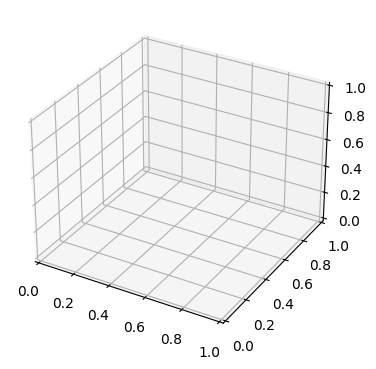

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

data = all_data_no_true[0:10].cpu().numpy()
num_figures, num_epochs, num_dims = data.shape

colors = plt.cm.plasma(np.linspace(1, 0, num_epochs))
colors = np.c_[colors, np.ones(num_epochs)*0.5]  # Add alpha channel

rows = int(np.ceil(np.sqrt(num_figures)))  # number of rows in subplot grid
cols = int(np.ceil(num_figures / rows))    # number of columns in subplot grid

fig = plt.figure(figsize=(20,20))

# iterate over all figures
for i in range(num_figures):
    ax = fig.add_subplot(rows, cols, i+1, projection='3d')

    xpos, ypos = np.meshgrid(np.arange(num_dims), np.arange(num_epochs))
    xpos = xpos.flatten('F')
    ypos = ypos.flatten('F')
    zpos = np.zeros_like(xpos)

    dx = dy = 0.5 * np.ones_like(zpos)
    dz = data[i].flatten('F')

    # Specify the color for each bar
    color_seq = np.array(colors)[ypos.astype(int)]
    
    ax.bar3d(xpos, ypos, zpos, dx, dy, dz, color=color_seq)

    ax.set_xlabel('Dimensions')
    ax.set_ylabel('Epochs')
    ax.set_zlabel('Values')
    ax.set_title('Example {}'.format(i+1))

plt.tight_layout()
plt.show()


In [4]:
colors.shape


(19, 5)

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

data = all_data_no_true[0:10].cpu().numpy()
num_figures, num_epochs, num_dims = data.shape

colors = plt.cm.plasma(np.linspace(1, 0, num_epochs))
colors.shape



(19, 4)

In [6]:
color_seq.shape

(1900, 5)

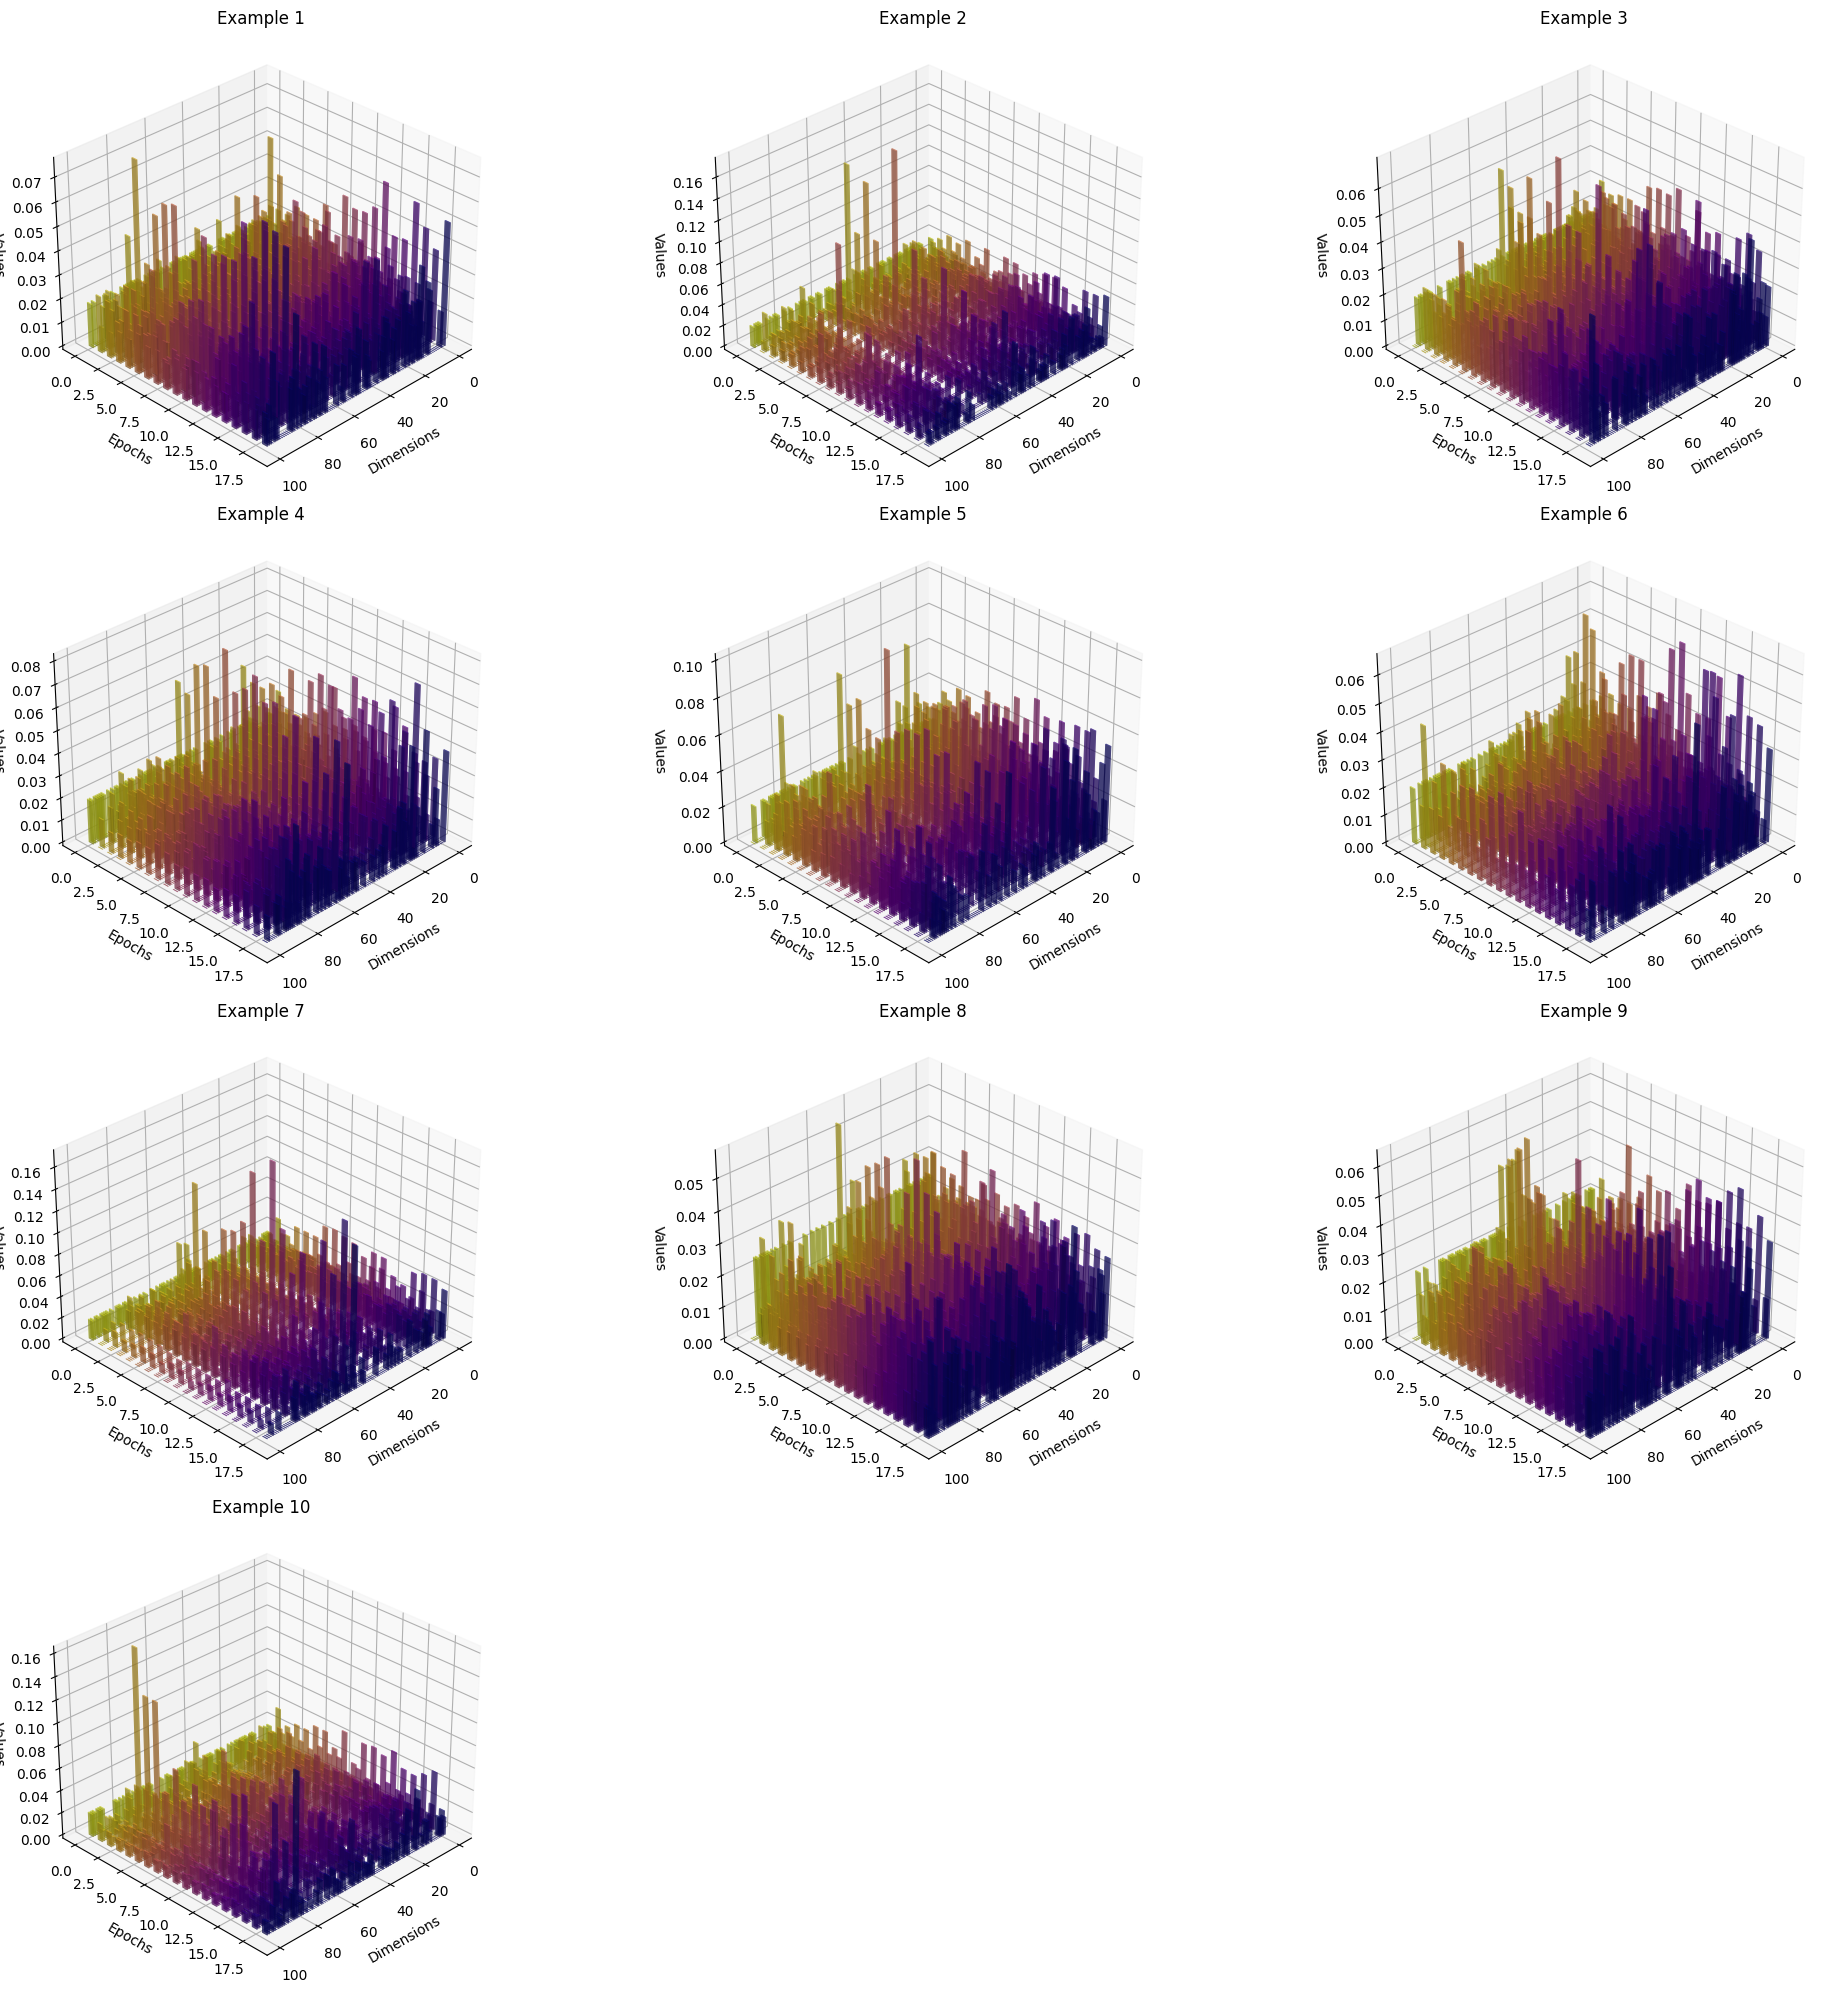

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

data = all_data_no_true[0:10].cpu().numpy()
num_figures, num_epochs, num_dims = data.shape

colors = plt.cm.plasma(np.linspace(1, 0, num_epochs))
colors[:, 3] = 0.5  # Adjust alpha values

rows = int(np.ceil(np.sqrt(num_figures)))  # number of rows in subplot grid
cols = int(np.ceil(num_figures / rows))    # number of columns in subplot grid

fig = plt.figure(figsize=(20,20))

# iterate over all figures
for i in range(num_figures):
    ax = fig.add_subplot(rows, cols, i+1, projection='3d')

    xpos, ypos = np.meshgrid(np.arange(num_dims), np.arange(num_epochs))
    xpos = xpos.flatten('F')
    ypos = ypos.flatten('F')
    zpos = np.zeros_like(xpos)

    dx = dy = 0.5 * np.ones_like(zpos)
    dz = data[i].flatten('F')

    # Specify the color for each bar
    color_seq = np.array(colors)[ypos.astype(int)]
    
    ax.bar3d(xpos, ypos, zpos, dx, dy, dz, color=color_seq)

    ax.set_xlabel('Dimensions')
    ax.set_ylabel('Epochs')
    ax.set_zlabel('Values')
    ax.set_title('Example {}'.format(i+1))

    ax.view_init(30, 45)  # Change viewing angle

plt.tight_layout()
plt.show()


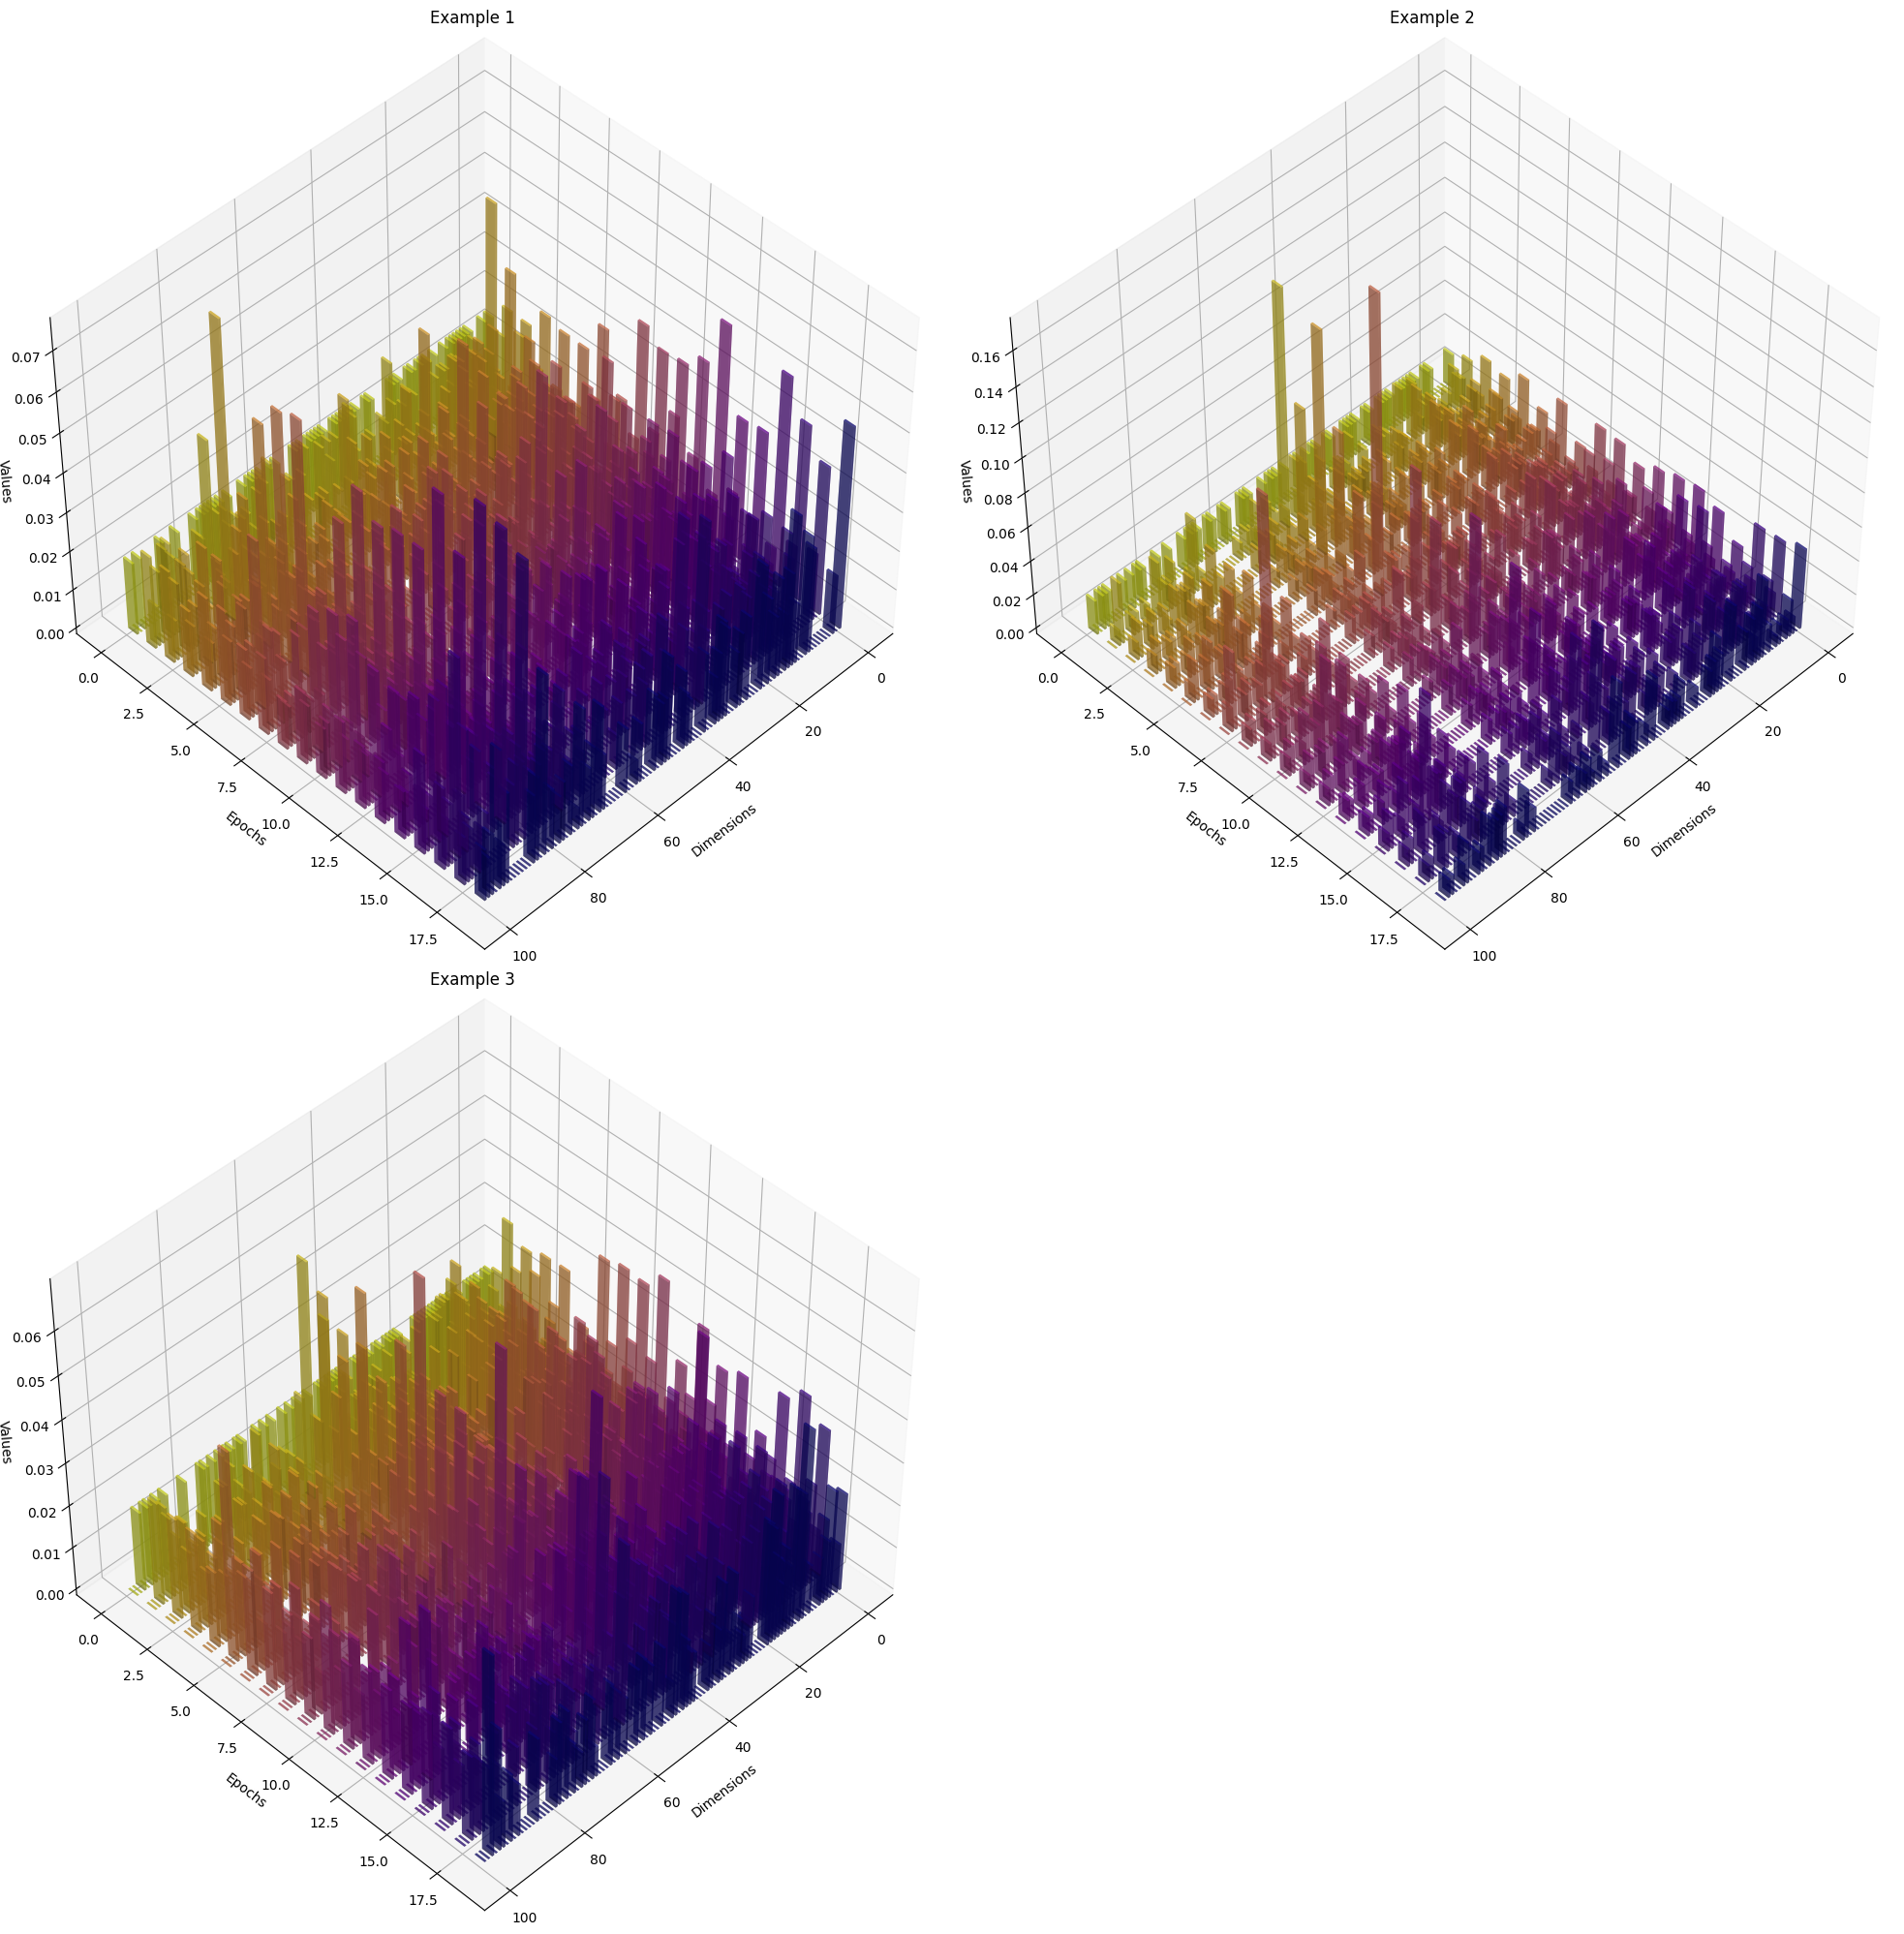

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

data = all_data_no_true[0:3].cpu().numpy()
num_figures, num_epochs, num_dims = data.shape

colors = plt.cm.plasma(np.linspace(1, 0, num_epochs))
colors[:, 3] = 0.5  # Adjust alpha values

rows = int(np.ceil(np.sqrt(num_figures)))  # number of rows in subplot grid
cols = int(np.ceil(num_figures / rows))    # number of columns in subplot grid

fig = plt.figure(figsize=(20,20))

# iterate over all figures
for i in range(num_figures):
    ax = fig.add_subplot(rows, cols, i+1, projection='3d')

    xpos, ypos = np.meshgrid(np.arange(num_dims), np.arange(num_epochs))
    xpos = xpos.flatten('F')
    ypos = ypos.flatten('F')
    zpos = np.zeros_like(xpos)

    dx = dy = 0.5 * np.ones_like(zpos)
    dz = data[i].flatten('F')

    # Specify the color for each bar
    color_seq = np.array(colors)[ypos.astype(int)]
    
    ax.bar3d(xpos, ypos, zpos, dx, dy, dz, color=color_seq)

    ax.set_xlabel('Dimensions')
    ax.set_ylabel('Epochs')
    ax.set_zlabel('Values')
    ax.set_title('Example {}'.format(i+1))

    ax.view_init(45, 45)  # Change viewing angle

plt.tight_layout()
plt.show()


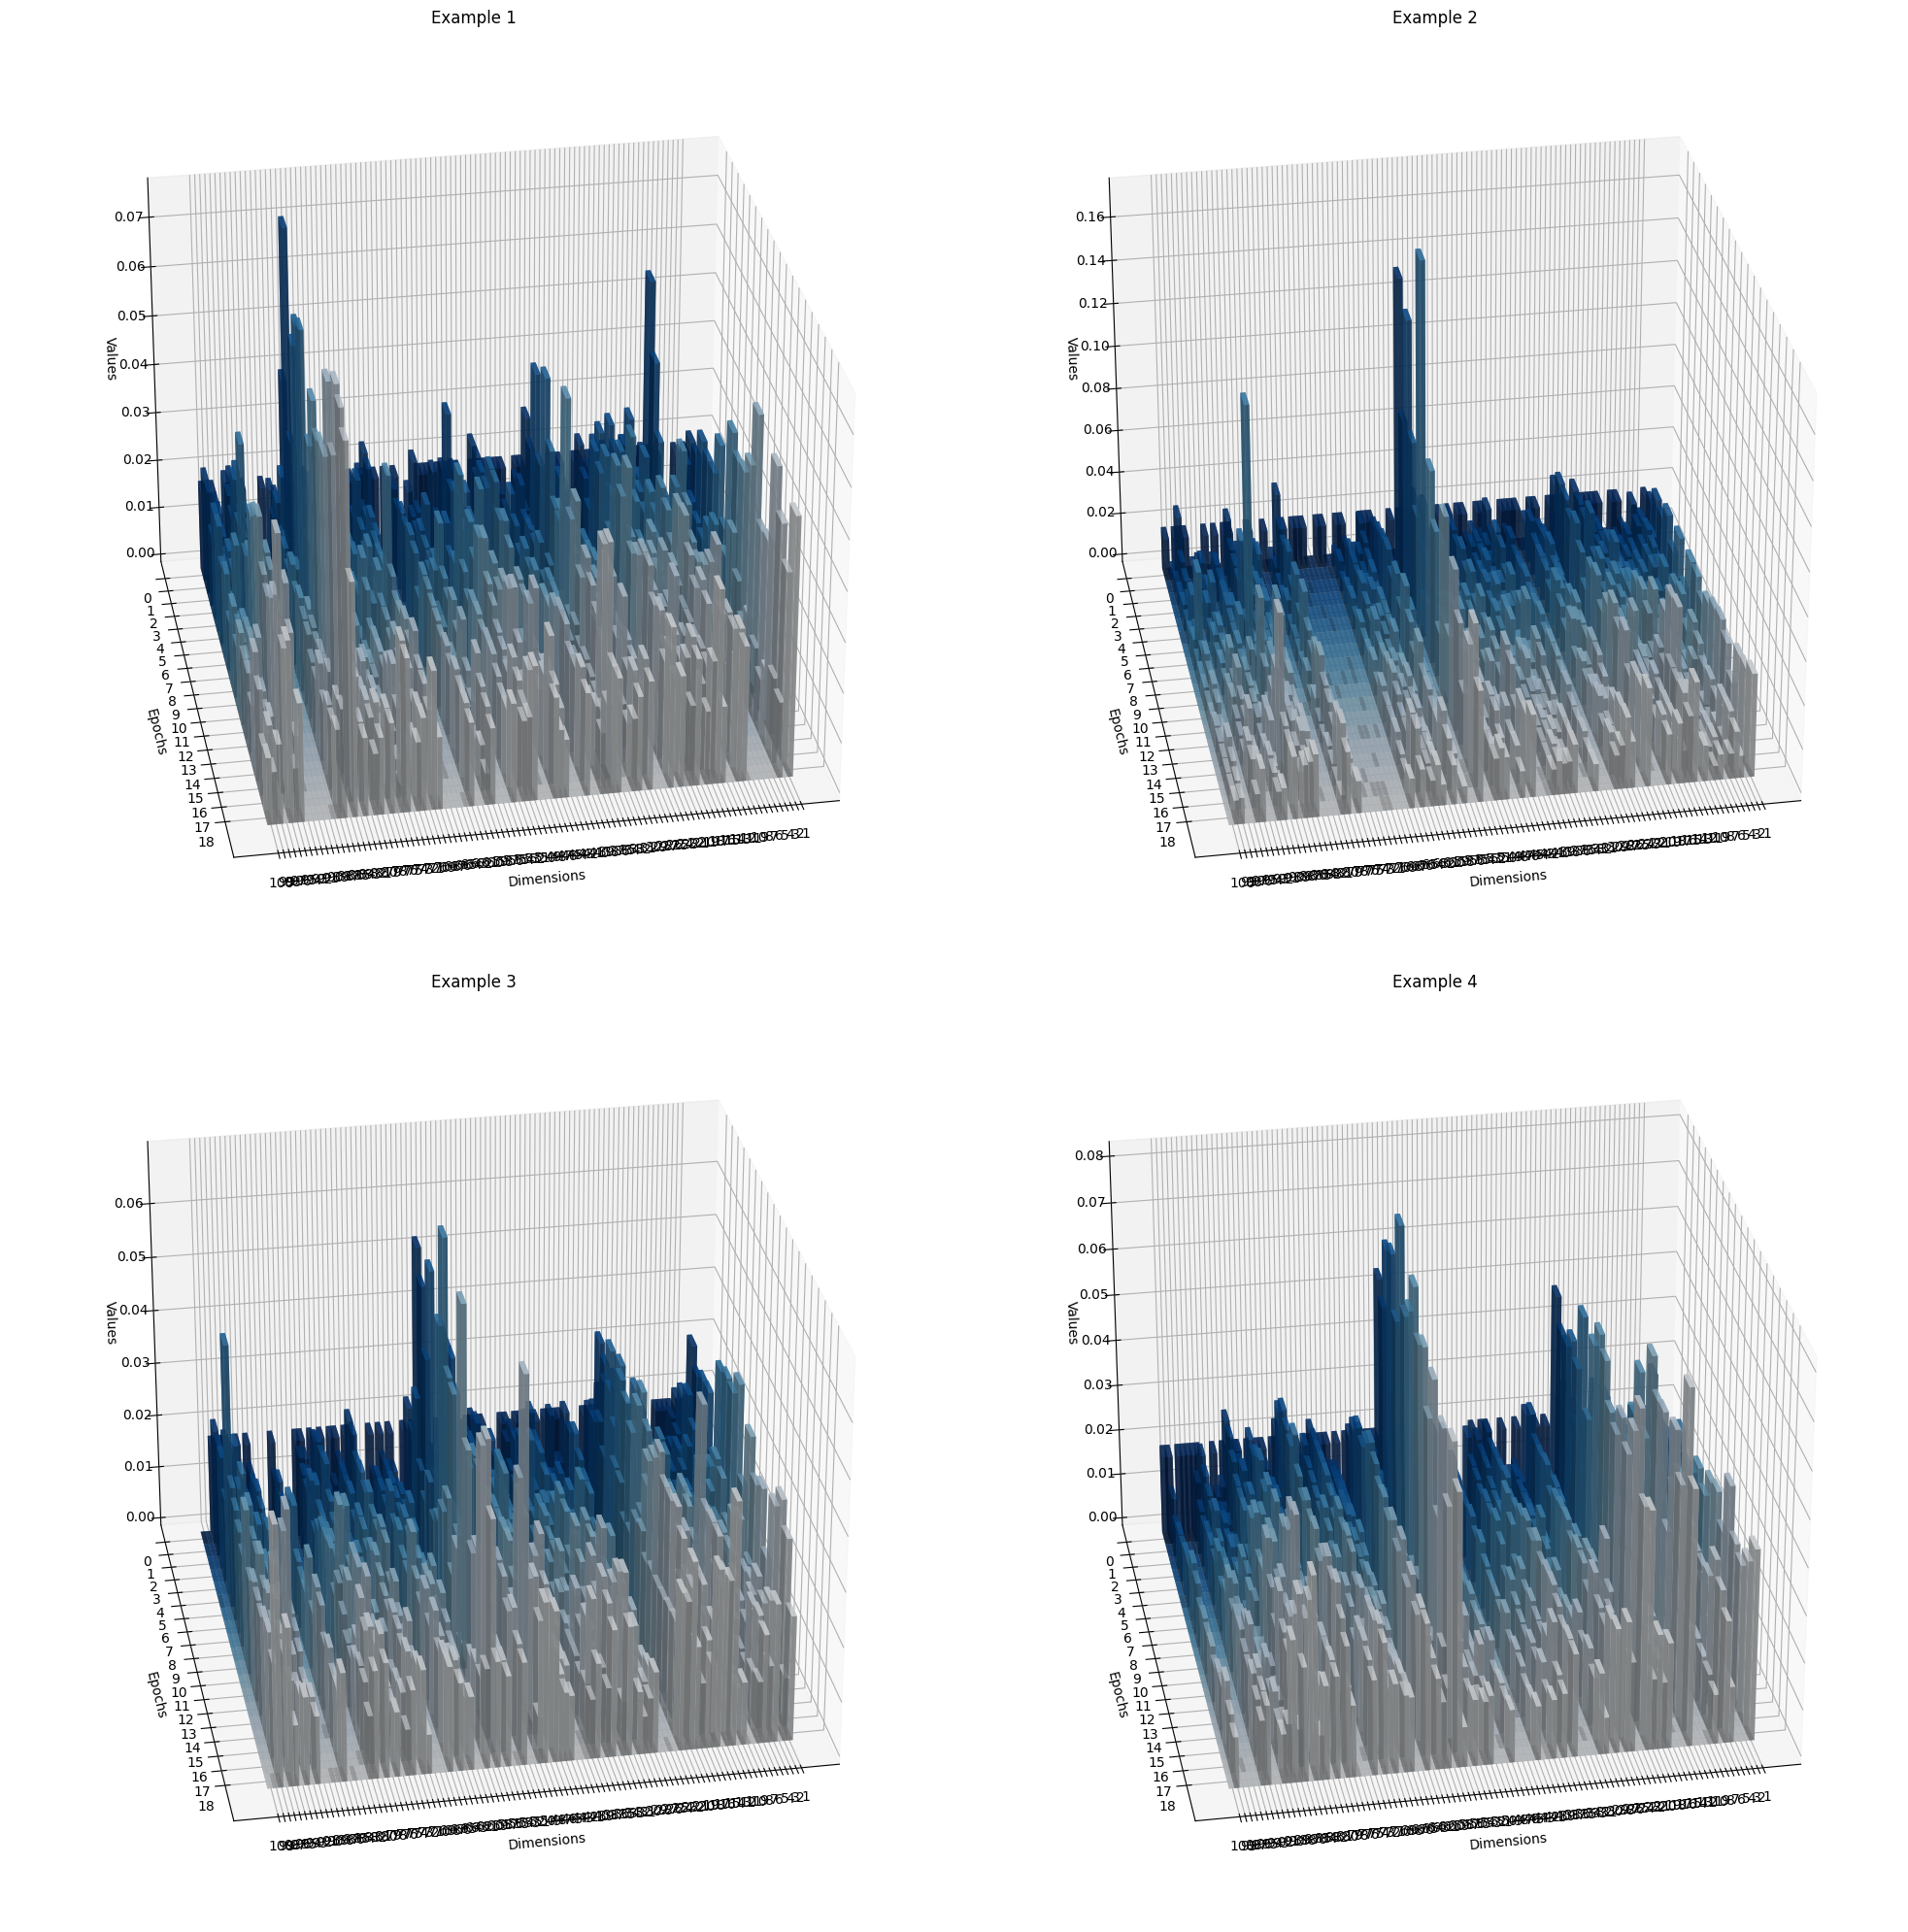

In [15]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

data = all_data_no_true[0:4].cpu().numpy()
num_figures, num_epochs, num_dims = data.shape

colors = plt.cm.Blues(np.linspace(0, 1, num_epochs))
colors[:, 3] = 0.7  # Adjust alpha values

rows = int(np.ceil(np.sqrt(num_figures)))  # number of rows in subplot grid
cols = int(np.ceil(num_figures / rows))    # number of columns in subplot grid

fig = plt.figure(figsize=(20,20))

# iterate over all figures
for i in range(num_figures):
    ax = fig.add_subplot(rows, cols, i+1, projection='3d')

    xpos, ypos = np.meshgrid(np.arange(1, 101, 1), np.arange(num_epochs))
    xpos = xpos.flatten('F')
    ypos = ypos.flatten('F')
    zpos = np.zeros_like(xpos)

    dx = dy = np.ones_like(zpos)
    dz = data[i].flatten('F')

    # Specify the color for each bar
    color_seq = np.array(colors)[ypos.astype(int)]
    
    ax.bar3d(xpos, ypos, zpos, dx, dy, dz, color=color_seq)

    ax.set_xlabel('Dimensions')
    ax.set_ylabel('Epochs')
    ax.set_zlabel('Values')
    ax.set_title('Example {}'.format(i+1))
    ax.set_xticks(np.arange(1, num_dims+1, 1))
    ax.set_yticks(np.arange(0, num_epochs, 1))


    ax.view_init(28, 80)  # Change viewing angle

plt.tight_layout()
plt.show()


In [10]:
num_dims

100